## Write Custom Function to Compute Histogram for a Numerical Array

- You can use numpy

- Your function takes two arguments: 1- list 2- interval

- Your function would return a dictionary with intervals as keys and how many of elements in list are in the intervals as values



In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

In [2]:
# histogram function

def custom_hist(ls, interval):
    ls.sort()
    hist_ls_dict = dict()
    min_ls, max_ls = np.min(ls), np.max(ls)
    I = (max_ls - min_ls) / interval
    low, high = min_ls, min_ls + I
    for j in range(interval):
        start, stop = np.searchsorted(ls, low, side="left"), np.searchsorted(ls, high, side="right")
        hist_ls_dict[j] = len(np.arange(start, stop))
        low, high = low + I, high + I
    return hist_ls_dict
        
print(custom_hist(df['Age'].dropna().values, 16))

{0: 44, 1: 20, 2: 19, 3: 96, 4: 122, 5: 108, 6: 88, 7: 67, 8: 47, 9: 39, 10: 24, 11: 18, 12: 14, 13: 3, 14: 4, 15: 1}


## For visualization part, you should elaborate on the following 

<BarContainer object of 16 artists>

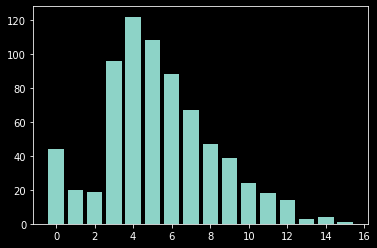

In [3]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)

plt.bar(hist_dict.keys(), hist_dict.values())

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

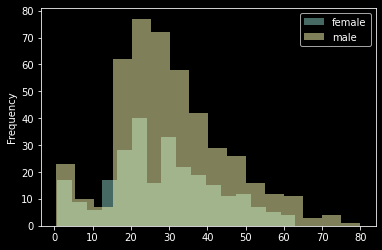

In [4]:
df.groupby("Sex")["Age"].plot(kind="hist", bins=16, legend=True, alpha=0.5)